In [1]:
import matplotlib
import matplotlib.pyplot as plt
import urllib.request
import re

reg_word_in_d = re.compile ('<ul><li>.*?</dl>', re.DOTALL)
reg_word = re.compile ('<ul><li><b>.*?</b>', re.DOTALL)
reg_pos = re.compile ('<dl><dd><i>.*?</i>', re.DOTALL)
reg_tag = re.compile ('<.*?>', re.DOTALL)

In [2]:
def create_html(url, encoding):
    user_agent = 'Mozilla/5.0 (Windows NT 6.1; Win64; x64)'  
    req = urllib.request.Request(url, headers={'User-Agent':user_agent})  
    with urllib.request.urlopen(req) as response:
        html = response.read().decode(encoding)
    return html



In [3]:
def find_entries (regex, text):
    found = re.findall(regex, text)
    words = {}
    for item in found:
        word = re.findall(reg_word, item)
        pos = re.findall (reg_pos, item)
        if len(word)!=0 and len(pos)!=0:
            word1 = re.sub(reg_tag, '', word[0])
            pos1 = re.sub(reg_tag, '', pos[0])
            pos2 = re.findall('[a-z]+', pos1)[0]
            words[word1.lower()] = pos2
    return words

In [4]:
def alphabet(dicta):
    alphabet = {}
    for key in dicta.keys():
        if list(alphabet.keys()).count(key[0])==0:
            alphabet[key[0]] = {key:dicta[key]}
        else:
            alphabet[key[0]][key]=dicta[key]
    return alphabet

In [5]:
def num_for_letter(alphabet):
    numbers = {}
    for letter in alphabet.keys():
        numbers[letter] = len(alphabet[letter].keys())
    return numbers

In [29]:
def pos(alphabet):
    pos_num = {}
    for key in alphabet.keys():
        for key_in in alphabet[key].keys():    
                if list(pos_num.keys()).count(alphabet[key][key_in]) == 0:
                    pos_num[alphabet[key][key_in]] = 1
                else:
                    pos_num[alphabet[key][key_in]] += 1
    new_num = {'v':pos_num['v']+pos_num['vtr']+pos_num['vin'], 'n':pos_num['n']+pos_num['np']+pos_num['na']+pos_num['ni']+pos_num['prop'], 'adj':pos_num['adj'], 'adv':pos_num['adv']+pos_num['loc'], 'intj':pos_num['intj'], 'num':pos_num['num'], 'pn':pos_num['pn']+pos_num['dem']+pos_num['det'], 'phrase':pos_num['phrase'], 'conj':pos_num['conj'], 'part':pos_num['part'], 'prep':pos_num['prep'] }
    return new_num

In [30]:
def visualize(dicta, title, ylabel, xlabel, p):
    num = len(list(dicta.keys()))
    k = 0
    li = []
    for i in range(num):
        k+= p
        li.append(k)

    X= li
    Y = list(dicta.values())
    plt.bar(X, Y)
    plt.xticks( li, dicta.keys() )
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

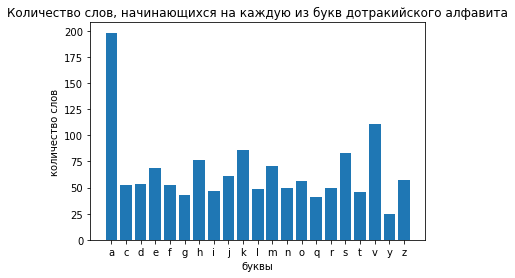

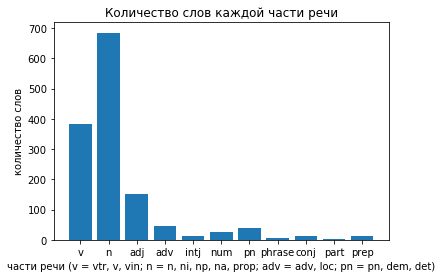

In [32]:
def main():
    html = create_html('http://wiki.dothraki.org/Vocabulary', 'utf-8')
    words = find_entries (reg_word_in_d, html)
    alph_words = alphabet(words)
    words_per_letter = num_for_letter(alph_words)
    words_per_pos = pos (alph_words)
    visualize(words_per_letter, "Количество слов, начинающихся на каждую из букв дотракийского алфавита", "количество слов", "буквы", 1)
    visualize(words_per_pos,"Количество слов каждой части речи", 'количество слов', 'части речи (v = vtr, v, vin; n = n, ni, np, na, prop; adv = adv, loc; pn = pn, dem, det)', 1 )
main()